#FeatureSelection


In [ ]:
# import necessary libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
           "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
           "peak-rpm", "city-mpg", "highway-mpg", "price"]
df = pd.read_csv(url, names=headers)

# Xóa các dòng có giá trị thiếu
df.dropna(inplace=True)

# Trích xuất các đặc trưng và biến mục tiêu
X = df[[ 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
        'drive-wheels', 'engine-location', 'wheel-base', 'length',
        'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
        'engine-size', 'fuel-system']]
y = df["make"]

# Chuyển đổi các biến hạng mục sang dạng số
label_encoder = LabelEncoder()
for column in ['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type',
               'num-of-cylinders', 'fuel-system']:
    X[column] = label_encoder.fit_transform(X[column])

# chuyển đổi num-of-doors thành số (2 cửa==> 1 , 4 cửa ==> 0)
X['num-of-doors'] = X['num-of-doors'].apply(lambda x: 1 if x == 'two' else 0)

# chọn đặc trưng sử dụng kiểm định chi-square
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
# cập nhật X với các đặc trưng đã chọn
X = X[X.columns[selector.get_support()]]
# cập nhật y với các giá trị tương ứng
y = df["make"]

# tạo DataFrame mới với các đặc trưng đã chọn
df_new = pd.concat([X, y], axis=1)

# lưu DataFrame mới vào tệp CSV
df_new.to_csv('selected_features.csv', index=False)

# in ra các đặc trưng đã chọn
print(X.columns)




Index(['aspiration', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system'],
      dtype='object')


<ipython-input-1-e14d180f1d6e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-1-e14d180f1d6e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-1-e14d180f1d6e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

#Biểu đồ phân bố của các thuộc tính numeric
Trong tập dữ liệu, có 14 thuộc tính là numeric. Chúng ta có thể sử dụng biểu đồ histogram để thấy phân bố của các thuộc tính này.

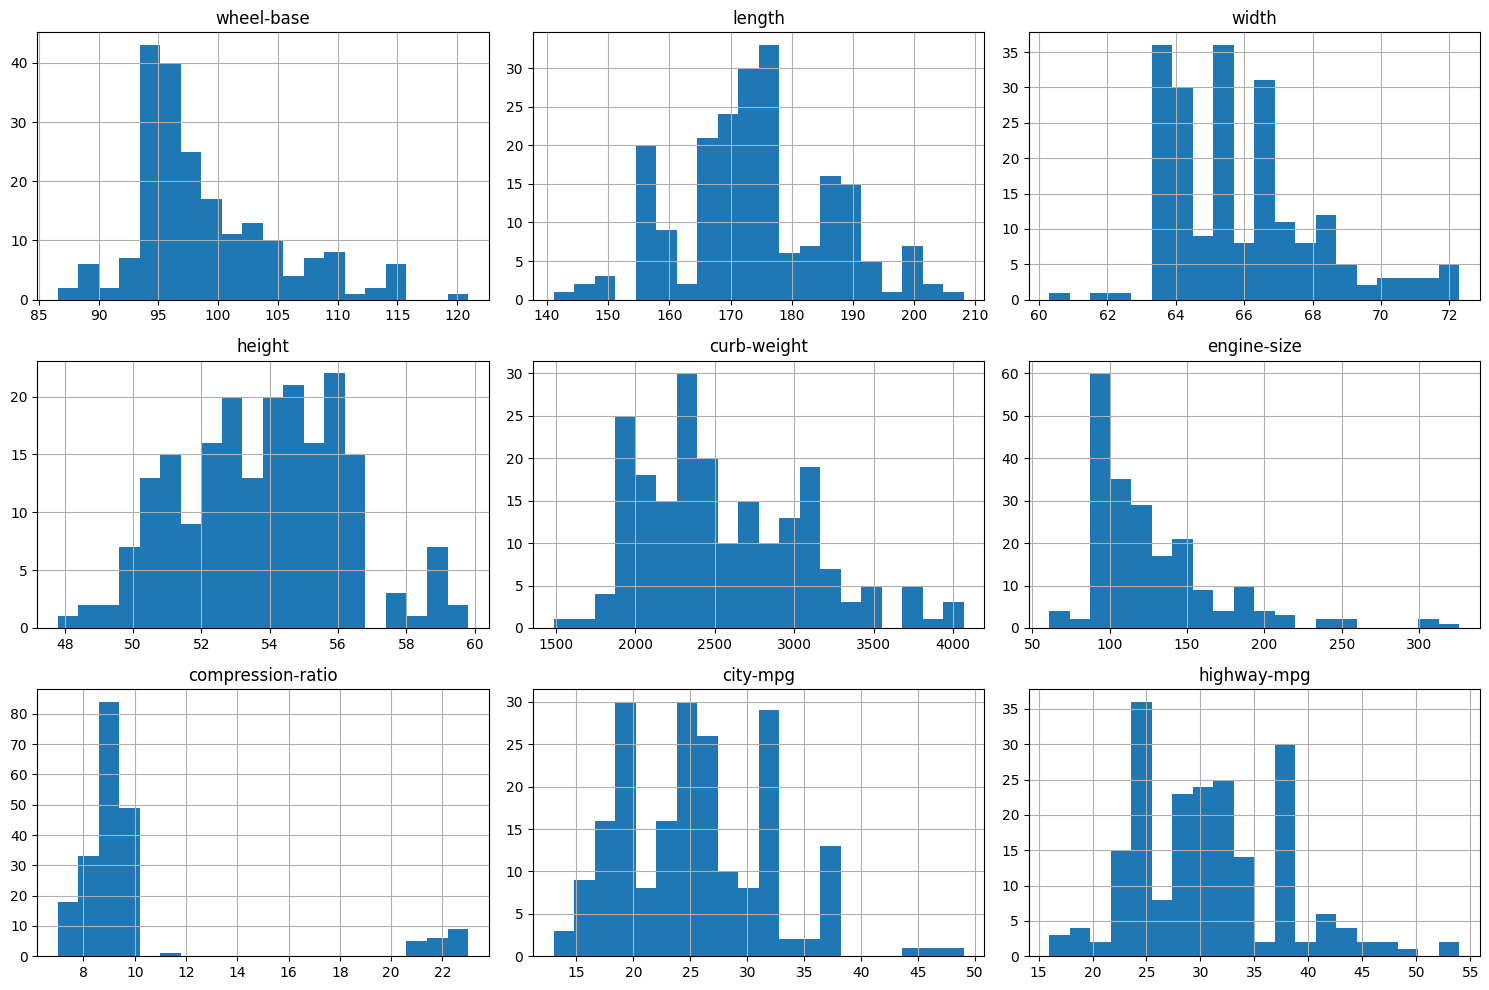

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(url, header=None)

# Set column names
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height",
           "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
           "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = headers

# Select numeric columns
numeric_cols = ["normalized-losses", "wheel-base", "length", "width", "height",
                "curb-weight", "engine-size", "bore", "stroke", "compression-ratio", "horsepower",
                "peak-rpm", "city-mpg", "highway-mpg", "price"]
numeric_df = df[numeric_cols]
# Plot histograms
numeric_df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


#Biểu đồ phân bố của các thuộc tính categorical
Trong tập dữ liệu, có 12 thuộc tính là categorical. Chúng ta có thể sử dụng biểu đồ bar chart để thấy phân bố của các thuộc tính này.

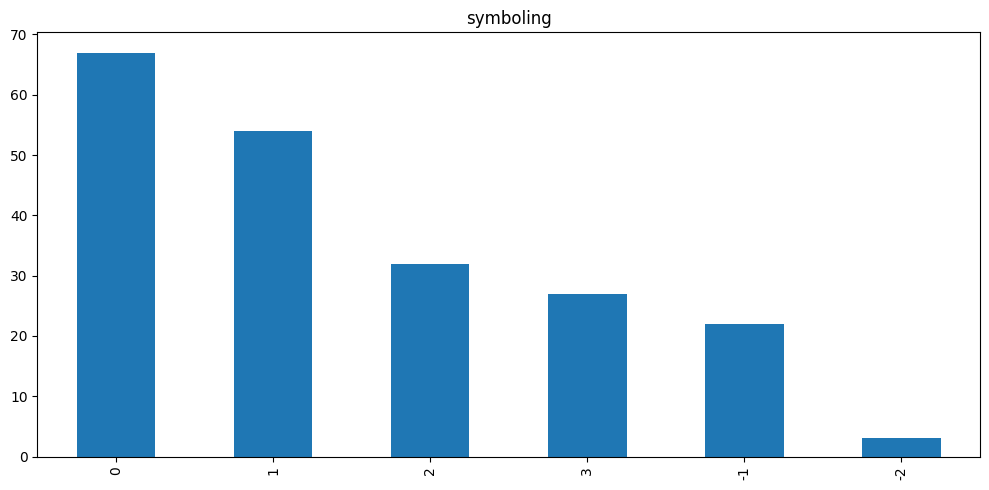

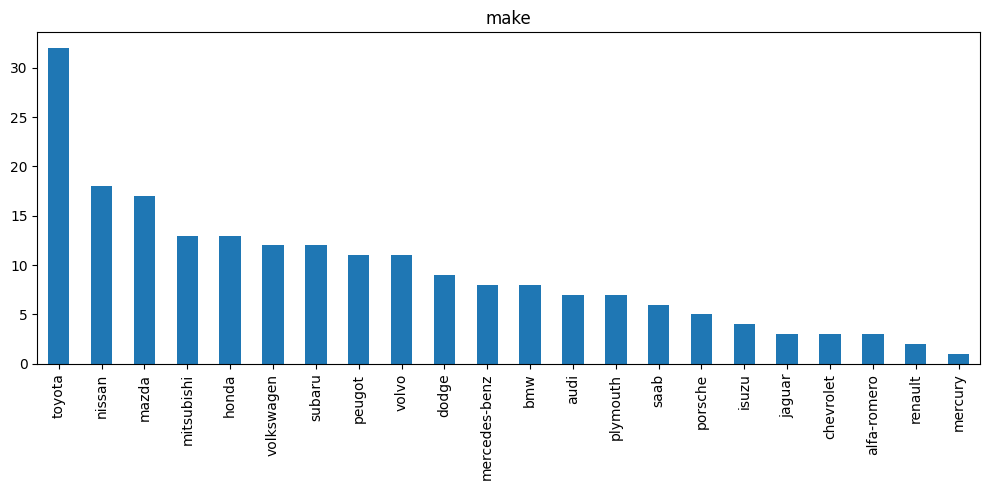

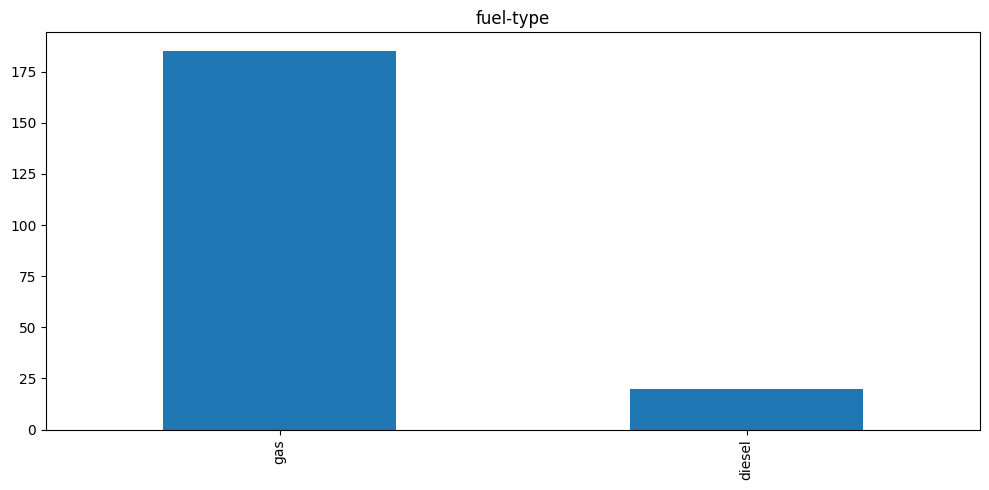

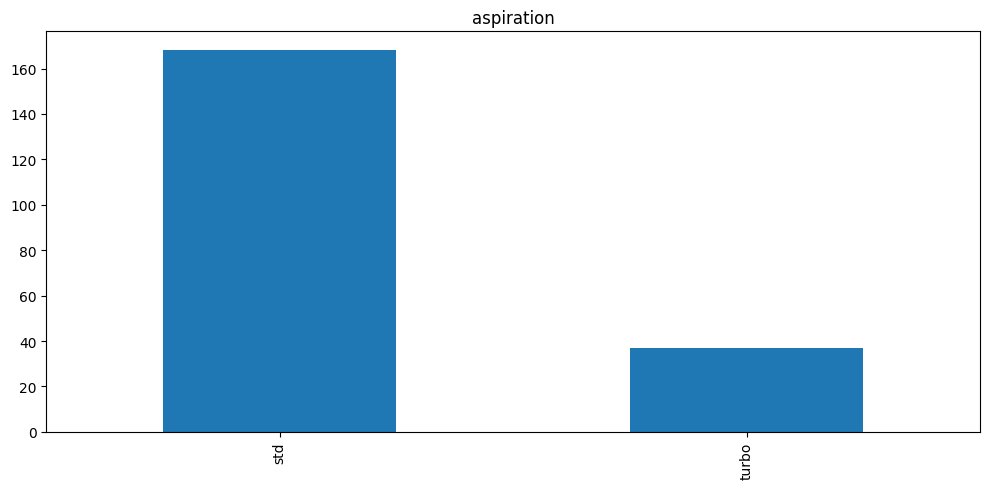

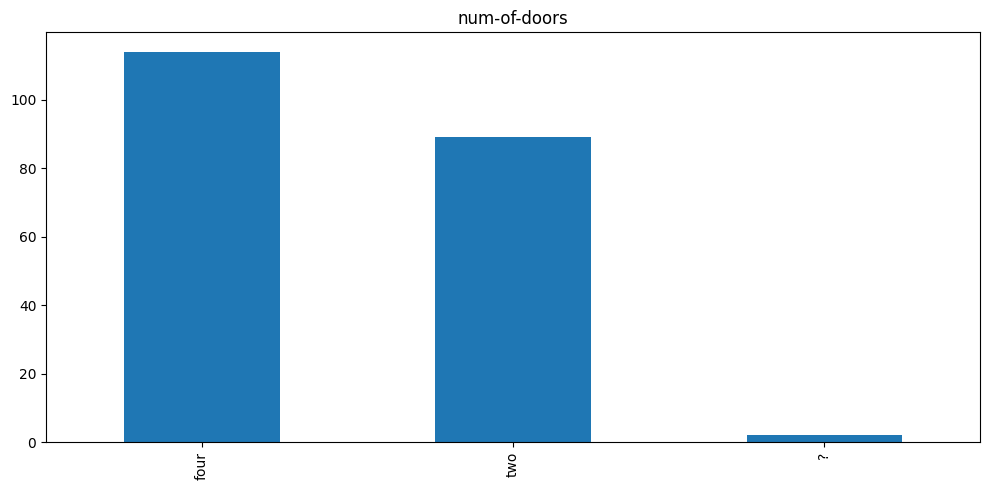

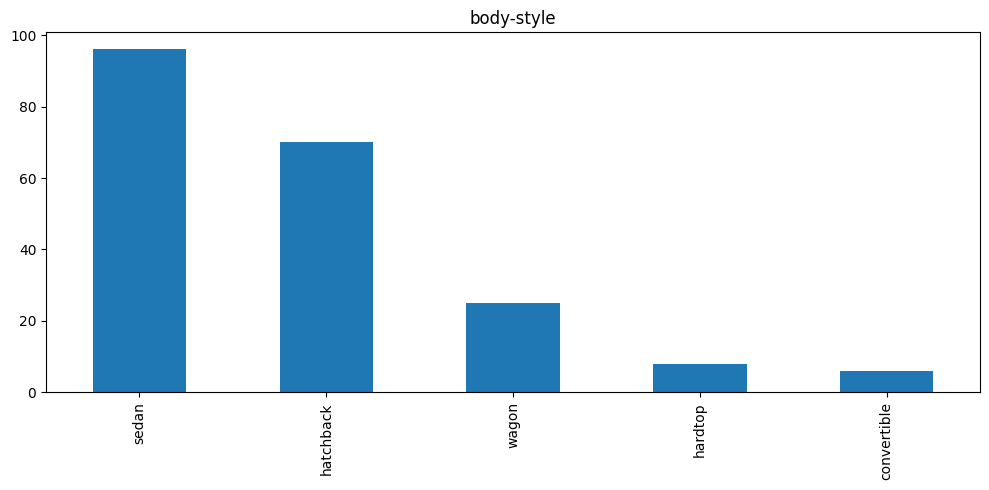

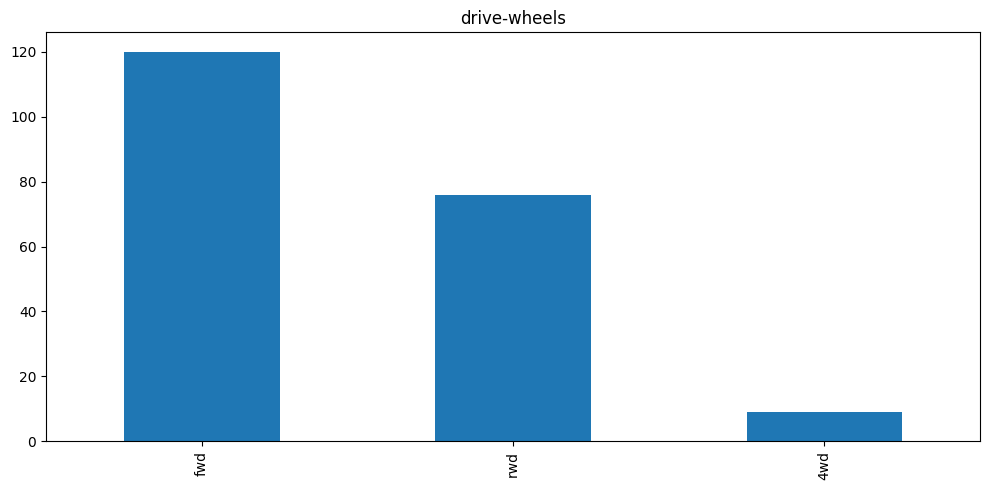

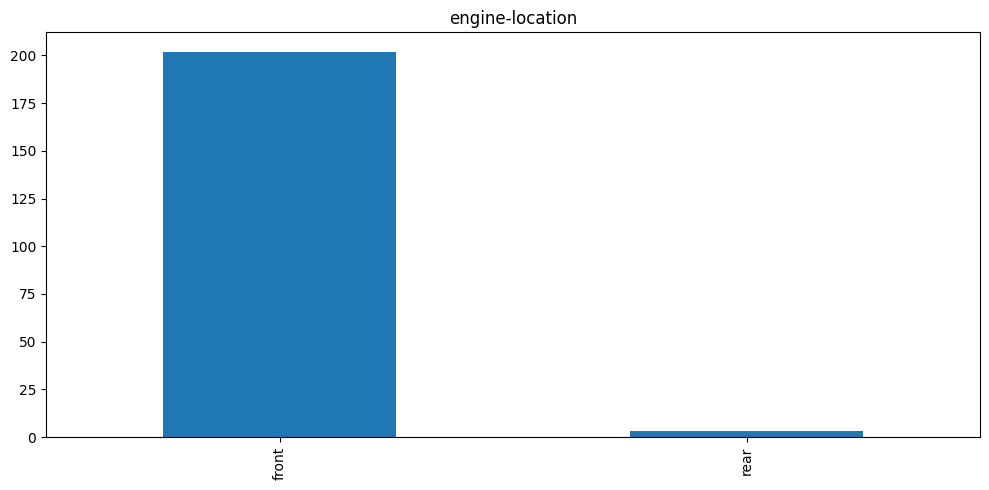

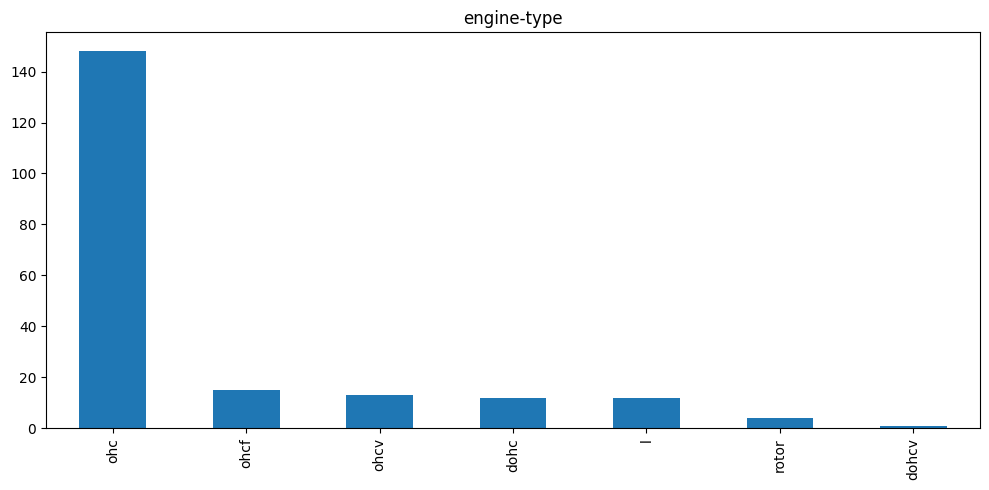

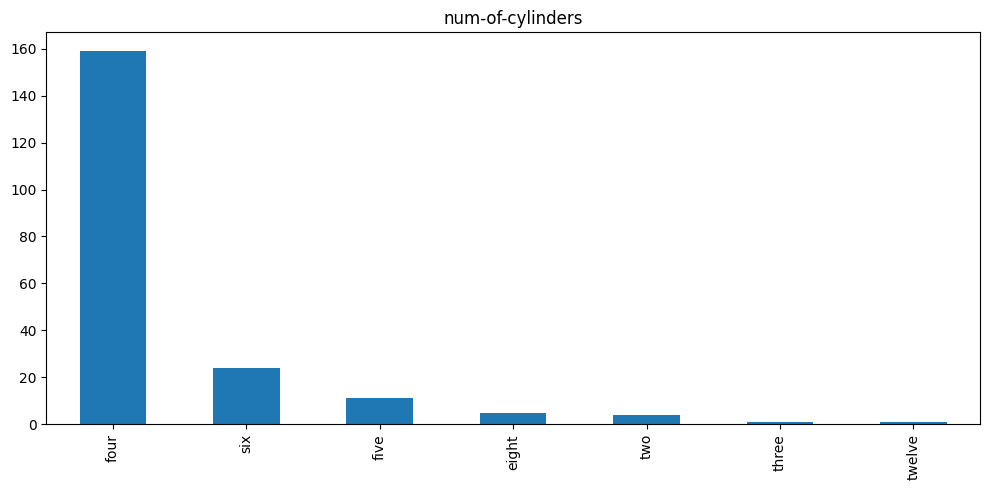

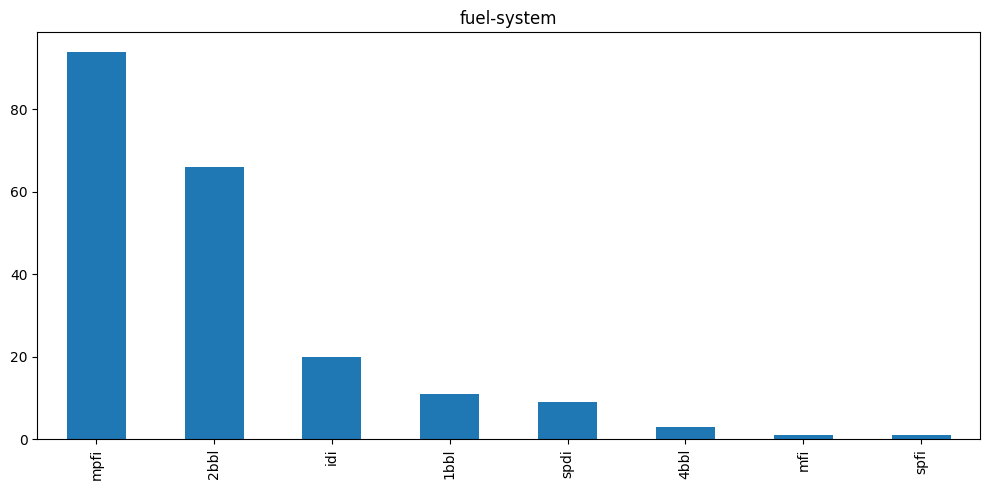

In [ ]:
# Select categorical columns
categorical_cols = ["symboling", "make", "fuel-type", "aspiration", "num-of-doors",
                    "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders",
                    "fuel-system"]
categorical_df = df[categorical_cols]

# Plot bar charts
for col in categorical_df:
    categorical_df[col].value_counts().plot(kind="bar", figsize=(10, 5))
    plt.title(col)
    plt.tight_layout()
    plt.show()


#Biểu đồ phân tán
Chúng ta sử dụng biểu đồ phân tán(scatter plot) để thấy mối quan hệ giữa các thuộc tính numeric.

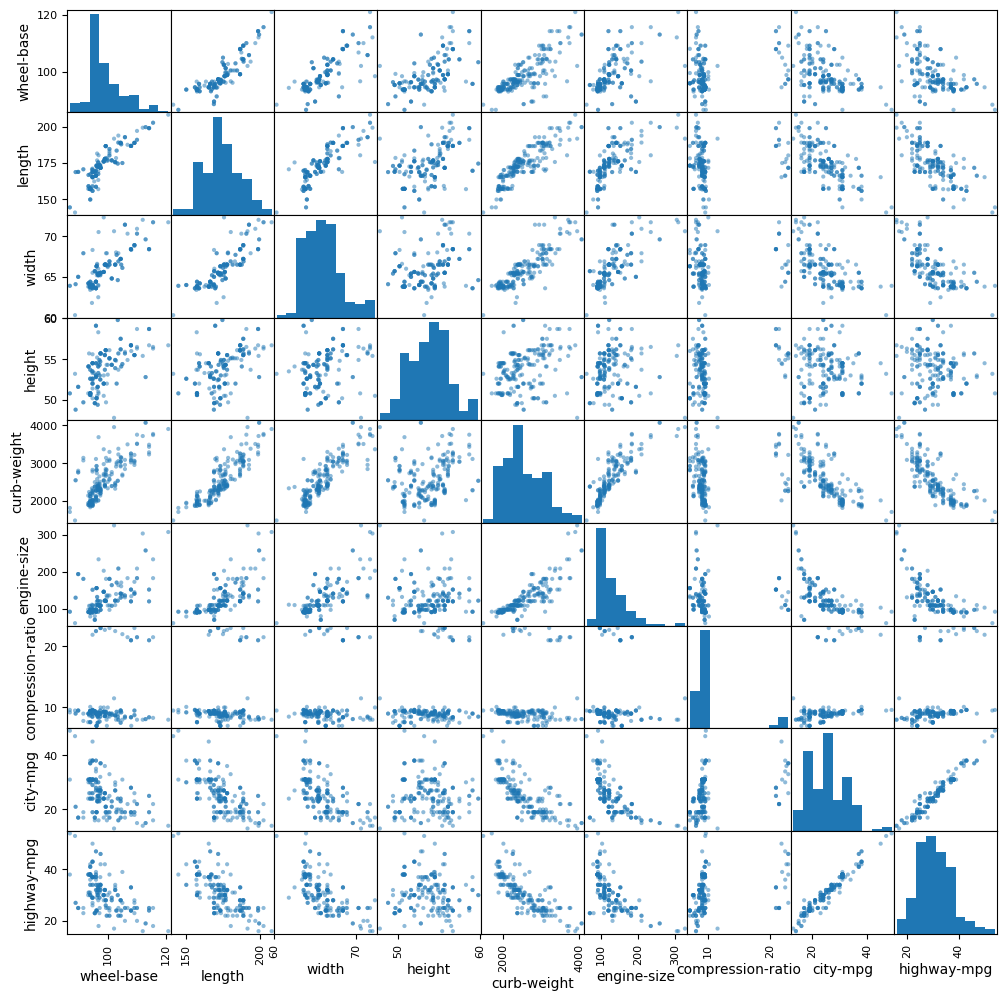

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# load data and select numeric columns
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(url, header=None)
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height",
           "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
           "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = headers
numeric_cols = ["normalized-losses", "wheel-base", "length", "width", "height",
                "curb-weight", "engine-size", "bore", "stroke", "compression-ratio", "horsepower",
                "peak-rpm", "city-mpg", "highway-mpg", "price"]
numeric_df = df[numeric_cols]

# plot scatter matrix
scatter_matrix(numeric_df, figsize=(12, 12))

# display plot
plt.show()


#SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV

#loaddata
df = pd.read_csv('selected_features.csv')
print(df.info())

# chuyển đổi biến phân loại thành số
X = pd.get_dummies(X)

# chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo một đối tượng GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100]}
svm_gs = GridSearchCV(estimator=SVC(kernel='linear'), 
                      param_grid=param_grid, 
                      scoring='accuracy', 
                      cv=2)
# Thực hiện tìm kiếm trên lưới các giá trị tham số
svm_gs.fit(X_train, y_train)
# Lấy thông tin về bộ tham số tốt nhất
print('Best params:', svm_gs.best_params_)
print('Best score:', svm_gs.best_score_)
# Tạo một đối tượng SVM với giá trị C tốt nhất
best_svm = SVC(kernel='linear', C=svm_gs.best_params_['C'])

# Huấn luyện mô hình với giá trị C tốt nhất
best_svm.fit(X_train, y_train)


# đưa ra dự đoán trên tập kiểm tra
y_pred = best_svm.predict(X_test)

# đánh giá mô hình bằng accuracy, recall, precision và F1-score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# print evaluation metrics
print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("Precision:",precision)
print("F1-score: ",f1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   aspiration        205 non-null    int64  
 1   drive-wheels      205 non-null    int64  
 2   engine-location   205 non-null    int64  
 3   wheel-base        205 non-null    float64
 4   length            205 non-null    float64
 5   curb-weight       205 non-null    int64  
 6   engine-type       205 non-null    int64  
 7   num-of-cylinders  205 non-null    int64  
 8   engine-size       205 non-null    int64  
 9   fuel-system       205 non-null    int64  
 10  make              205 non-null    object 
dtypes: float64(2), int64(8), object(1)
memory usage: 17.7+ KB
None


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best params: {'C': 1}
Best score: 0.45121951219512196
Accuracy:  0.5121951219512195
Recall:  0.5121951219512195
Precision: 0.6837398373983741
F1-score:  0.537989652623799


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Thực hiện feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Xử lý mất cân bằng lớp bằng cách sử dụng oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Thực hiện việc chọn đặc trưng
selector = SelectKBest(score_func=mutual_info_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

# Xác định các giá trị hyperparameters để tìm kiếm
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15], 'p': [1, 2]}

# Tạo một mô hình kNN với grid search và cross-validation
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, param_grid, cv=5)
knn_gs.fit(X_train_selected, y_train_resampled)

# Lấy các giá trị hyperparameters tốt nhất
best_k = knn_gs.best_params_['n_neighbors']
best_p = knn_gs.best_params_['p']
print('Best k:', best_k)
print('Best p:', best_p)

# Tạo một mô hình kNN với các giá trị hyperparameters tốt nhất
knn = KNeighborsClassifier(n_neighbors=best_k, p=best_p)

# Huấn luyện mô hình trên tập huấn luyện
knn.fit(X_train_selected, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test_selected)

# Đánh giá mô hình bằng accuracy, recall, precision và F1-score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1)


Best k: 1
Best p: 1
Accuracy: 0.8048780487804879
Recall: 0.8048780487804879
Precision: 0.8414634146341463
F1-score: 0.801805511561609


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# load data
df = pd.read_csv('selected_features.csv')

# Chuẩn bị dữ liệu cho việc mô hình hóa
X = df.drop('make', axis=1)
y = df['make']

# Chuyển đổi biến phân loại thành biến số
X = pd.get_dummies(X)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xác định các giá trị hyperparameters để tìm kiếm
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Tạo một mô hình DecisionTree
dt_model = DecisionTreeClassifier(random_state=42)

# Tạo một đối tượng GridSearchCV
dt_gs = GridSearchCV(dt_model, param_grid, cv=5)

# Tìm kiếm trên lưới các giá trị tham số
dt_gs.fit(X_train, y_train)

# Lấy các giá trị hyperparameters tốt nhất
best_max_depth = dt_gs.best_params_['max_depth']
best_min_samples_split = dt_gs.best_params_['min_samples_split']
best_min_samples_leaf = dt_gs.best_params_['min_samples_leaf']
print('Best max_depth:', best_max_depth)
print('Best min_samples_split:', best_min_samples_split)
print('Best min_samples_leaf:', best_min_samples_leaf)

# Tạo một mô hình DecisionTree với các giá trị hyperparameters tốt nhất
best_dt_model = DecisionTreeClassifier(max_depth=best_max_depth,
                                       min_samples_split=best_min_samples_split,
                                       min_samples_leaf=best_min_samples_leaf,
                                       random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
best_dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = best_dt_model.predict(X_test)

# Đánh giá mô hình bằng accuracy, recall, precision và F1-score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("Precision:",precision)
print("F1-score: ",f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best max_depth: None
Best min_samples_split: 2
Best min_samples_leaf: 1
Accuracy:  0.7804878048780488
Recall:  0.7804878048780488
Precision: 0.8526422764227642
F1-score:  0.7765776229190864


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# load data
df = pd.read_csv('selected_features.csv')

# Chuẩn bị dữ liệu cho việc mô hình hóa
X = df.drop('make', axis=1)
y = df['make']

# Chuyển đổi biến phân loại thành biến số
X = pd.get_dummies(X)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa các giá trị hyperparameters để tìm kiếm
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Tạo một mô hình RandomForest với grid search và cross-validation
rf = RandomForestClassifier(random_state=42)
rf_gs = GridSearchCV(rf, param_grid, cv=5)
rf_gs.fit(X_train, y_train)

# Lấy các giá trị hyperparameters tốt nhất
best_n_estimators = rf_gs.best_params_['n_estimators']
best_max_depth = rf_gs.best_params_['max_depth']
best_min_samples_split = rf_gs.best_params_['min_samples_split']
best_min_samples_leaf = rf_gs.best_params_['min_samples_leaf']
print('Best n_estimators:', best_n_estimators)
print('Best max_depth:', best_max_depth)
print('Best min_samples_split:', best_min_samples_split)
print('Best min_samples_leaf:', best_min_samples_leaf)

# Tạo một mô hình RandomForest với các giá trị hyperparameters tốt nhất
rf_model = RandomForestClassifier(n_estimators=best_n_estimators,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf,
                                   random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá mô hình bằng accuracy, recall, precision và F1-score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("Precision:",precision)
print("F1-score: ",f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best n_estimators: 200
Best max_depth: 10
Best min_samples_split: 2
Best min_samples_leaf: 1
Accuracy:  0.8536585365853658
Recall:  0.8536585365853658
Precision: 0.8567073170731707
F1-score:  0.8445993031358885


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load dataset
df = pd.read_csv('selected_features.csv')

# Tách đặc trưng và biến mục tiêu
X = df.drop('make', axis=1)
y = df['make']

# Chuyển đổi biến phân loại thành biến số
label_encoder = LabelEncoder()
X_encoded = X.copy()
for column in X.columns:
    X_encoded[column] = label_encoder.fit_transform(X[column])

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Tạo một bộ phân loại mạng nơ-ron và huấn luyện trên tập huấn luyện
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000, 2000, 3000]
}

mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameters, cv=20)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)

# Dự đoán lớp của tập kiểm tra bằng bộ phân loại đã được huấn luyện
y_pred = clf.predict(X_test)

# Đánh giá bộ phân loại bằng các chỉ số độ chính xác, recall, f1 và precision
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stoc

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
Best score: 0.7444444444444445
Accuracy: 0.6829268292682927
Recall: 0.6829268292682927
F1 Score: 0.6889663182346109
Precision: 0.7317073170731707


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Biểu đồ đườn so sánh các Metric

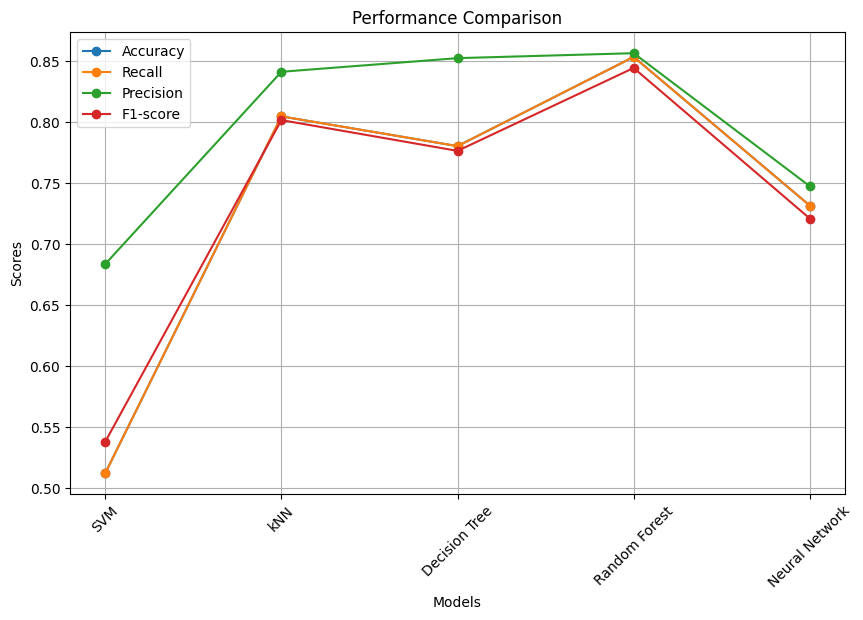

In [ ]:
import matplotlib.pyplot as plt

# Các mô hình
models = ['SVM', 'kNN', 'Decision Tree', 'Random Forest', 'Neural Network']

# Các độ đo hiệu suất
accuracy = [0.5121951219512195, 0.8048780487804879, 0.7804878048780488, 0.8536585365853658, 0.7317073170731707]
recall = [0.5121951219512195, 0.8048780487804879, 0.7804878048780488, 0.8536585365853658, 0.7317073170731707]
precision = [0.6837398373983741, 0.8414634146341463, 0.8526422764227642, 0.8567073170731707, 0.7475609756097561]
f1_score = [0.537989652623799, 0.801805511561609, 0.7765776229190864, 0.8445993031358885, 0.721090387374462]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, f1_score, marker='o', label='F1-score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Biểu đồ cột so sách các Metric

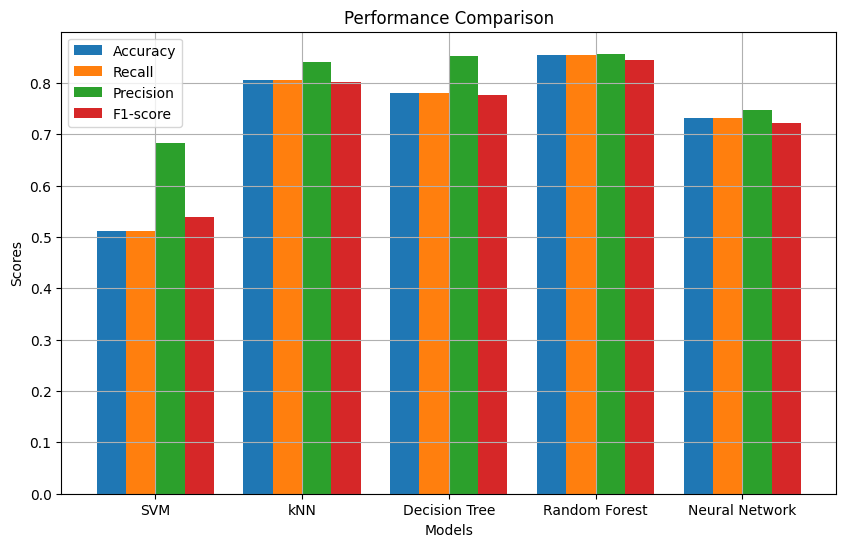

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Các mô hình
models = ['SVM', 'kNN', 'Decision Tree', 'Random Forest', 'Neural Network']

# Các độ đo hiệu suất
accuracy = [0.5121951219512195, 0.8048780487804879, 0.7804878048780488, 0.8536585365853658, 0.7317073170731707]
recall = [0.5121951219512195, 0.8048780487804879, 0.7804878048780488, 0.8536585365853658, 0.7317073170731707]
precision = [0.6837398373983741, 0.8414634146341463, 0.8526422764227642, 0.8567073170731707, 0.7475609756097561]
f1_score = [0.537989652623799, 0.801805511561609, 0.7765776229190864, 0.8445993031358885, 0.721090387374462]

# Vẽ biểu đồ
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, recall, width, label='Recall')
plt.bar(x + 0.5*width, precision, width, label='Precision')
plt.bar(x + 1.5*width, f1_score, width, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(True)
plt.show()
